In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Dataset/weight-height.csv')

In [ ]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
8550,Female,60.483946,110.565497
8551,Female,63.423372,129.921671
8552,Female,65.584057,155.942671
8553,Female,67.429971,151.678405


In [ ]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [ ]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [ ]:
df.shape

(8555, 3)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

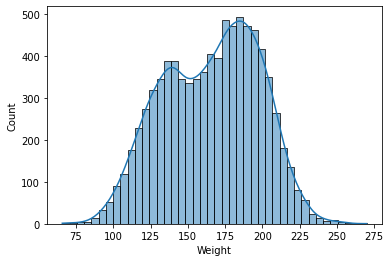

In [ ]:
sns.histplot(df['Weight'], kde=True)

In [ ]:
mean_value = df['Weight'].mean()
mean_value

165.6327353266768

In [ ]:
std_value = df['Weight'].std()
std_value

32.04392221721551

In [ ]:
std_3 = mean_value + (2.5*std_value)

In [ ]:
std_3

245.74254086971558

In [ ]:
ngt_std_3 = mean_value - (2.5*std_value)
ngt_std_3

85.52292978363802

In [ ]:
df[df['Weight']>std_3]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1506,Male,75.698618,249.565628
1610,Male,76.617546,255.863326
1750,Male,74.604668,249.946283
1896,Male,76.472880,246.232321
2014,Male,78.998742,269.989698
2070,Male,77.465569,252.556689
2971,Male,75.156879,250.317151
3228,Male,76.268668,247.386741
3285,Male,78.528210,253.889004


In [ ]:
df[df['Weight']<ngt_std_3]

,Gender,Height,Weight
151,Male,65.350411,65.780000
160,Male,64.333648,68.640000
5026,Female,56.547975,84.872124
5214,Female,56.785434,83.993077
5360,Female,55.668202,68.982530
5740,Female,56.108902,80.531259
6624,Female,54.616858,71.393749
6982,Female,56.764456,79.174376
7294,Female,54.873728,78.606670
7324,Female,56.810317,84.170695


In [ ]:
merge_outliers = df[(df['Weight'] > std_3) | (df['Weight'] < ngt_std_3)]

In [ ]:
merge_outliers.head()

,Gender,Height,Weight
151,Male,65.350411,65.780000
160,Male,64.333648,68.640000
994,Male,78.095867,255.690835
1506,Male,75.698618,249.565628
1610,Male,76.617546,255.863326


In [ ]:
merge_outliers.shape

(27, 3)

In [ ]:
remove_out_columns = df[(df['Weight'] < std_3) & (df['Weight'] > ngt_std_3)]

In [ ]:
remove_out_columns.shape

(8528, 3)

<AxesSubplot:xlabel='Weight', ylabel='Count'>

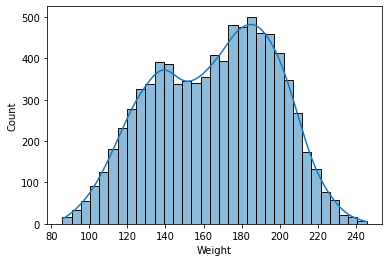

In [ ]:
sns.histplot(remove_out_columns['Weight'], kde=True)

In [ ]:
#One Hot Encoding
dummy_variables = pd.get_dummies(remove_out_columns['Gender'], drop_first=True)
dummy_variables.head()

,Male
0,1
1,1
2,1
3,1
4,1


In [ ]:
new_df = remove_out_columns.drop('Gender',axis=1)


In [ ]:
new_df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [ ]:
df = pd.concat([new_df,dummy_variables],axis=1)

In [ ]:
df.head()

,Height,Weight,Male
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


In [ ]:
x = df.drop('Height',axis=1)

In [ ]:
x.head()

,Weight,Male
0,241.893563,1
1,162.310473,1
2,212.740856,1
3,220.042470,1
4,206.349801,1


In [ ]:
y=df['Height']

In [ ]:
y.head()

0    73.847017
1    68.781904
2    74.110105
3    71.730978
4    69.881796
Name: Height, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30,random_state=42)

In [ ]:
xtrain.shape

(5969, 2)

In [ ]:
xtest.shape

(2559, 2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
Ire = LinearRegression()

In [ ]:
Ire.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
Ire.coef_

array([ 0.12368722, -0.99863883])

In [ ]:
Ire.intercept_

46.92063788584914

In [ ]:
Ire.predict(xtest)

array([66.21313293, 61.53372733, 63.47981906, ..., 70.37833922,
       69.94908919, 69.10116118])

In [ ]:
Ire.score(xtest,ytest)

0.8535161062270603

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
pred = Ire.predict(xtest)

In [ ]:
mean_squared_error(ytest,pred)

2.082404972379389

In [ ]:
r2_score(ytest,pred)

0.8535161062270603